# Download any OSM Geospatial Entities with OSMnx

Author: [Geoff Boeing](https://geoffboeing.com/)

More info:

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [Documentation and install instructions](https://osmnx.readthedocs.io)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Journal article and citation info](http://geoffboeing.com/publications/osmnx-complex-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  
This notebook provides a quick tour of using OSMnx to download any geospatial entites/objects from OpenStreetMap as a geopandas GeoDataFrame.

In [1]:
import osmnx as ox

%matplotlib inline
ox.config(use_cache=True, log_console=False)
ox.__version__

'1.1.2'

Use the `geometries` module to download entities, such as grocery stores, transit stops, points of interest, or building footprints, and turn them into a GeoDataFrame: [see docs](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.geometries).

To query, pass a `tags` dict where keys are OSM tags. The dict's values can be either:
  1. `True` to retrieve all OSM objects with this tag, regardless of its value
  2. a single value as a string to retrieve all OSM objects with this tag:value combination
  3. a list of string values to retrieve all OSM objects where this tag matches any of these values

Pass multiple dict key:value pairs to retrieve the union (not intersection) of these pairs.

In [2]:
# get all building footprints in some neighborhood
# `True` means retrieve any object with this tag, regardless of value
place = "Bunker Hill, Los Angeles, California"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

/Users/junhyun/.pyenv/versions/3.8.5/envs/openstreetmap/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


(56, 47)

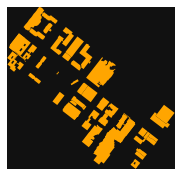

In [3]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [4]:
# get all the parks in some neighborhood
# constrain acceptable `leisure` tag values to `park`
tags = {"leisure": "park"}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

/Users/junhyun/.pyenv/versions/3.8.5/envs/openstreetmap/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


(1, 4)

In [5]:
# get everything tagged amenity,
# and everything tagged landuse = retail or commercial,
# and everything tagged highway = bus_stop
tags = {"amenity": True, "landuse": ["retail", "commercial"], "highway": "bus_stop"}
gdf = ox.geometries_from_place("Piedmont, California, USA", tags)
gdf.shape

/Users/junhyun/.pyenv/versions/3.8.5/envs/openstreetmap/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


(138, 60)

In [6]:
# view just the banks
gdf[gdf["amenity"] == "bank"].dropna(axis=1, how="any")

amenity             name  \
element_type osmid                                 
node         2810181540    bank         Citibank   
way          276424028     bank  Bank of America   
             285549437     bank      Wells Fargo   

                                                                  geometry  \
element_type osmid                                                           
node         2810181540                        POINT (-122.23256 37.82515)   
way          276424028   POLYGON ((-122.23258 37.82491, -122.23252 37.8...   
             285549437   POLYGON ((-122.23147 37.82466, -122.23134 37.8...   

                                   brand brand:wikidata     brand:wikipedia  
element_type osmid                                                           
node         2810181540         Citibank        Q857063         en:Citibank  
way          276424028   Bank of America        Q487907  en:Bank of America  
             285549437       Wells Fargo        Q744149      en:Wells Fargo

In [7]:
# view just the bus stops
gdf[gdf["highway"] == "bus_stop"].dropna(axis=1, how="any").head()

name  \
element_type osmid                                            
node         4071030440  Park Boulevard & Saint James Drive   
             5844909127      Park Boulevard & Estates Drive   
             5845148873     Hampton Road & Sandringham Road   
             5845152990     Hampton Road & Sandringham Road   
             5845153014       Hampton Road & Seaview Avenue   

                                            geometry  bus   highway  \
element_type osmid                                                    
node         4071030440  POINT (-122.21517 37.81248)  yes  bus_stop   
             5844909127  POINT (-122.21392 37.81363)  yes  bus_stop   
             5845148873  POINT (-122.21492 37.81822)  yes  bus_stop   
             5845152990  POINT (-122.21459 37.81818)  yes  bus_stop   
             5845153014  POINT (-122.22303 37.81763)  yes  bus_stop   

                            network public_transport    ref route_ref  
element_type osmid                                                     
node         4071030440  AC Transit         platform  57544  V;33;688  
             5844909127  AC Transit         platform  54866  V;33;688  
             5845148873  AC Transit         platform  53832        33  
             5845152990  AC Transit         platform  50830        33  
             5845153014  AC Transit         platform  53865        33